In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import gamma, norm

In [2]:
alpha, beta = 5, 7
dist = gamma(a=alpha, scale=1/beta)
samples = dist.rvs(50)

In [3]:
mu = samples.mean()
var = samples.var(ddof=1)
beta_guess = mu/var
alpha_guess = mu**2 / var

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_85209/2950032268.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inces" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('first_hist.png', dpi=300, bbox_inces='tight')


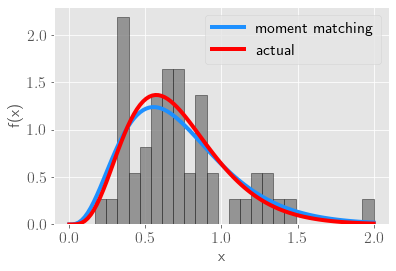

In [4]:
plt.hist(samples, edgecolor='black', alpha=.8, bins=25, density=True, color='gray')
x = np.linspace(0, 2, 100)
plt.plot(x, gamma.pdf(x=x, a=alpha_guess, scale=1/beta_guess), color='dodgerblue', label='moment matching')
plt.plot(x, dist.pdf(x=x), label='actual', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('first_hist.png', dpi=300, bbox_inces='tight')

In [13]:
def plot(dist, ax, B=500, n=50):
    values = []
    for i in range(B):
        samples = dist.rvs(n)
        mu = samples.mean()
        var = samples.var(ddof=1)
        beta_guess = mu/var
        alpha_guess = mu**2 / var
        alpha_hat = mu**2/var
        alpha = dist.mean()**2/ dist.var()
        values.append(np.sqrt(n)* (alpha_hat - alpha) / np.sqrt(2 * alpha_hat * (alpha_hat + 1)))
    ax.hist(values, edgecolor='black', alpha=.8, bins=25, density=True, color='gray', label='samples')
    x = np.linspace(-3, 3, 100)
    ax.plot(x, norm().pdf(x), label='N(0,1)')

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_85209/1259710452.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inces" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('second_hist.png', dpi=300, bbox_inces='tight')


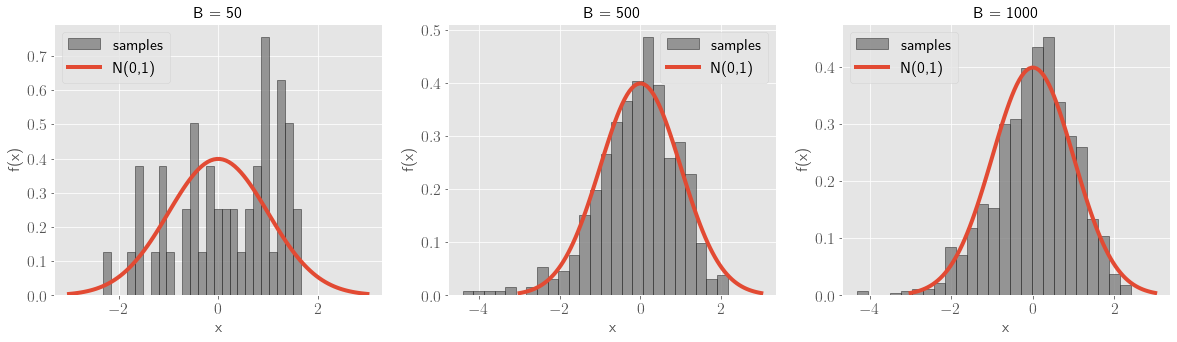

In [14]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
Bs = [50, 500, 1000]
for B, ax in zip(Bs, axes):
    plot(dist, ax, B=B)
    ax.set_title(f'B = {B}')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
plt.savefig('second_hist.png', dpi=300, bbox_inces='tight')